In [1]:
import sys 
sys.path.append('../')
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

base_dir = '../data/fashion'
print(os.listdir(base_dir))

['train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz', 't10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz']


In [2]:
from utils import mnist_reader, dataset_helper
X, y = mnist_reader.load_mnist('../data/fashion', kind='train')

/root/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
X.dtype, y.dtype

(dtype('uint8'), dtype('uint8'))

In [4]:
X = X.copy() / 255.

Given the dtypes, there is no possibility of negative values in the dataset. 

## Introduction
Dataset description: 
* 60k training images 
* 10k test set
* 28x28 or 784 pixels per image

Class labels: 
0.	T-shirt/top
1.	Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot



In [5]:
X.shape, y.shape

((60000, 784), (60000,))

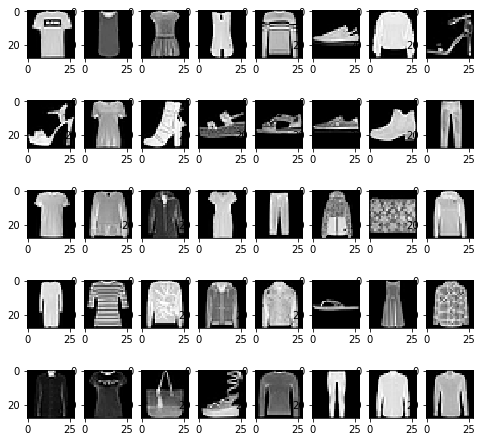

In [6]:
import numpy as np
import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 8
rows = 5

for i in range(1, columns*rows +1):
    img = X[i].reshape((28, 28))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()


## Proof of concept comparing the MLP from sklearn 

In [7]:
nclasses =10
X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42)    
y_train = dataset_helper.one_hot_encode(y_train, nclasses)
y_val = dataset_helper.one_hot_encode(y_val, nclasses)

In [8]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((48000, 784), (12000, 784), (48000, 10), (12000, 10))

In [9]:
lr = 0.0001
b_sz = 256
eps = np.finfo(np.float64).eps
nfeatures  = X_train.shape[1]
epoch_sz = X_train.shape[0]
max_iter = 200 * (epoch_sz // b_sz) 
print_interval = 10 * (epoch_sz // b_sz) 

Model Summary
-------------------------------
H1      (input=784, neurons=256, activation=sigmoid)
H2      (input=256, neurons=100, activation=sigmoid)
soft    (input=100, neurons=10, activation=sigmoid)
-------------------------------

Shuffled
It: 1870 Batch: 178 Epoch 9 Train Loss: 0.22911445 lr: 0.000100 Val Loss: 0.14648108 Val Acc 0.68541667
It: 3740 Batch: 168 Epoch 19 Train Loss: 0.14090464 lr: 0.000100 Val Loss: 0.11345614 Val Acc 0.74650000
It: 5610 Batch: 158 Epoch 29 Train Loss: 0.11470850 lr: 0.000100 Val Loss: 0.10302487 Val Acc 0.77908333
It: 7480 Batch: 148 Epoch 39 Train Loss: 0.10287728 lr: 0.000100 Val Loss: 0.09520826 Val Acc 0.80225000
It: 9350 Batch: 138 Epoch 49 Train Loss: 0.09506467 lr: 0.000100 Val Loss: 0.09099570 Val Acc 0.81608333
It: 11220 Batch: 128 Epoch 59 Train Loss: 0.08964446 lr: 0.000100 Val Loss: 0.08753358 Val Acc 0.82391667
It: 13090 Batch: 118 Epoch 69 Train Loss: 0.08578426 lr: 0.000100 Val Loss: 0.08612452 Val Acc 0.82925000
It: 14960 Batch: 1

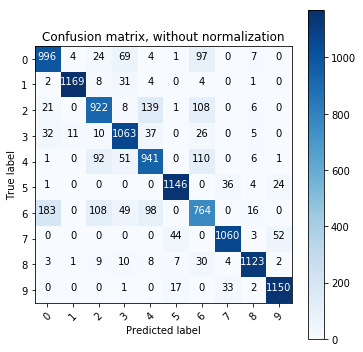

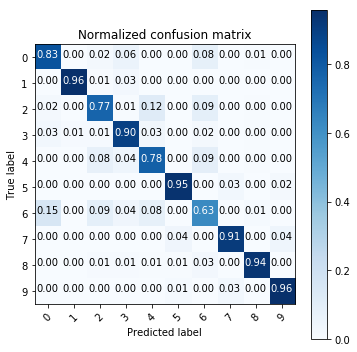

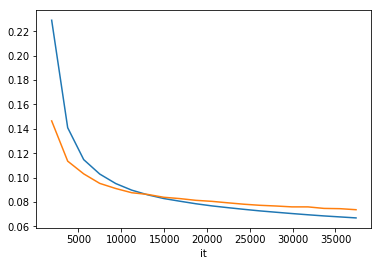

In [10]:
import time
import timeit
from NN import activation_functions, loss_functions
import NN.network as network

from utils import dataset_helper
from utils import custom_scores
from importlib import reload 
reload(custom_scores)
reload(dataset_helper)
reload(loss_functions)
reload(activation_functions)
reload(network)
reload(dataset_helper)


h1 = network.Layer(nfeatures, 256, 'sigmoid',  label="H1")
h2 = network.Layer(256, 100, 'sigmoid',  label="H2")
o1 = network.Layer(100, nclasses, 'sigmoid', label="soft")

model = network.NN(loss='cross_entropy')
model.add_layer(h1)
model.add_layer(h2)
model.add_layer(o1)
model.summary()

print("")
model.fit(X_train, y_train, max_iter=max_iter, 
          lr=lr, epsilon=eps, b_sz = b_sz,
          X_val=X_val, Y_val=y_val,
          print_interval=print_interval)
iteraction_log = network.get_iteration_log()

Y_ = np.array(model.predict(X_val)).argmax(axis=-1)
reload(custom_scores)
custom_scores.evaluate_multiclass(y_val=y_val.argmax(axis=-1), y_pred=Y_)
iteraction_log.index = iteraction_log.it
iteraction_log.error_train.plot()
iteraction_log.error_val.plot()

In [ ]:
import time
import timeit
from NN import activation_functions, loss_functions
import NN.network as network

from utils import dataset_helper
from utils import custom_scores
from importlib import reload 
reload(custom_scores)
reload(dataset_helper)
reload(loss_functions)
reload(activation_functions)
reload(network)
reload(dataset_helper)


h1 = network.Layer(nfeatures, 256, 'relu',  label="H1")
h2 = network.Layer(256, 100, 'relu',  label="H2")
o1 = network.Layer(100, nclasses, 'sigmoid', label="soft")

model = network.NN(loss='cross_entropy')
model.add_layer(h1)
model.add_layer(h2)
model.add_layer(o1)
model.summary()

print("")
model.fit(X_train, y_train, max_iter=max_iter, 
          lr=lr, epsilon=eps, b_sz = b_sz,
          X_val=X_val, Y_val=y_val,
          print_interval=print_interval)
iteraction_log = network.get_iteration_log()

Y_ = np.array(model.predict(X_val)).argmax(axis=-1)
reload(custom_scores)
custom_scores.evaluate_multiclass(y_val=y_val.argmax(axis=-1), y_pred=Y_)
iteraction_log.index = iteraction_log.it
iteraction_log.error_train.plot()
iteraction_log.error_val.plot()

Model Summary
-------------------------------
H1      (input=784, neurons=256, activation=relu)
H2      (input=256, neurons=100, activation=relu)
soft    (input=100, neurons=10, activation=sigmoid)
-------------------------------

Shuffled
It: 1870 Batch: 178 Epoch 9 Train Loss: 0.10145390 lr: 0.000100 Val Loss: 0.08038788 Val Acc 0.84741667
It: 3740 Batch: 168 Epoch 19 Train Loss: 0.07141648 lr: 0.000100 Val Loss: 0.08028791 Val Acc 0.85916667
It: 5610 Batch: 158 Epoch 29 Train Loss: 0.06305220 lr: 0.000100 Val Loss: 0.06765541 Val Acc 0.87341667
It: 7480 Batch: 148 Epoch 39 Train Loss: 0.05754780 lr: 0.000100 Val Loss: 0.06551320 Val Acc 0.87966667
It: 9350 Batch: 138 Epoch 49 Train Loss: 0.05319051 lr: 0.000100 Val Loss: 0.06759331 Val Acc 0.88141667
It: 11220 Batch: 128 Epoch 59 Train Loss: 0.04975050 lr: 0.000100 Val Loss: 0.06371635 Val Acc 0.88666667
It: 13090 Batch: 118 Epoch 69 Train Loss: 0.04673699 lr: 0.000100 Val Loss: 0.06326027 Val Acc 0.89075000
It: 14960 Batch: 108 Epo